<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/Export_Planet_TrainingData_2_27_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("dplyr")
install.packages("devtools")

devtools:::install_github("gearslaboratory/gdalUtils")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
iterators   (NA -> 1.0.14) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]
foreach     (NA -> 1.5.2 ) [CRAN]


Skipping 1 packages not available: rgdal

Installing 6 packages: R.methodsS3, R.oo, iterators, rgdal, R.utils, foreach

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmphhNjHn/remotes90e23d4b7ad/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmphhNjHn/file90e4c98be73/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”


In [ ]:
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)
# library(gdalUtils)

drive_auth(use_oob = TRUE, cache = FALSE)

In [3]:
dir.create("/content/workingfolder")
dir.create("/content/workingfolder/nwi_utm4")
dir.create("/content/workingfolder/nwi_utm5")

dir.create("/content/workingfolder/aoi")
dir.create("/content/workingfolder/aoi/utm4")
dir.create("/content/workingfolder/aoi/utm5")

dir.create("/content/workingfolder/dem")
dir.create("/content/workingfolder/dem/utm4")
dir.create("/content/workingfolder/dem/utm5")

dir.create("/content/workingfolder/ccap")
dir.create("/content/workingfolder/ccap/utm4")
dir.create("/content/workingfolder/ccap/utm5")

dir.create("/content/workingfolder/nlcd")
dir.create("/content/workingfolder/nlcd/utm4")
dir.create("/content/workingfolder/nlcd/utm5")

dir.create("/content/workingfolder/planet")
dir.create("/content/workingfolder/planet/2018")
dir.create("/content/workingfolder/planet/2018/utm4")
dir.create("/content/workingfolder/planet/2018/utm5")

dir.create("/content/workingfolder/planet/2019")
dir.create("/content/workingfolder/planet/2019/utm4")
dir.create("/content/workingfolder/planet/2019/utm5")

dir.create("/content/workingfolder/planet/2020")
dir.create("/content/workingfolder/planet/2020/utm4")
dir.create("/content/workingfolder/planet/2020/utm5")

In [4]:
cl <- makeCluster(8)
########################################################################## load NWI data

# load NUMERIC nwi data
# https://drive.google.com/file/d/1NHOKJKTqlNeuDg4DlfYfM3evDTvp0q8S/view?usp=drive_link
# This file is the national wetland inventory vector file (for utm 4 islands = Kauai, Oahu, Molokai, Maui) that includes a column called wetland_ty_numeric numbered 1 - 7 for the 7 differenet wetland categories.
drive_download(file = as_id('1NHOKJKTqlNeuDg4DlfYfM3evDTvp0q8S'), path =  '/content/workingfolder/nwi_utm4/nwi_utm4.gpkg', overwrite = FALSE)

# https://drive.google.com/file/d/1vjY2D7TCsFj5Mcs3Wk5Gh0OV3MIPD_M4/view?usp=drive_link
# This file is the national wetland inventory vector file (for utm 5 island = Hawaii)that includes a column called wetland_ty_numeric numbered 1 - 7 for the 7 differenet wetland categories.
drive_download(file = as_id('1vjY2D7TCsFj5Mcs3Wk5Gh0OV3MIPD_M4'), path =  '/content/workingfolder/nwi_utm5/nwi_utm5.gpkg', overwrite = FALSE)




########################################################################## load AOI data

# https://drive.google.com/file/d/1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH/view?usp=drive_link
# This file is the area of interest vector file (for utm 4 islands = Kauai, Oahu, Molokai, Maui) that outlines which areas of interest to clip data to.
drive_download(file = as_id("1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH"),
path = "/content/workingfolder/aoi/utm4/aoi_utm4.gpkg", overwrite = FALSE)

# https://drive.google.com/file/d/1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc/view?usp=drive_link
# This file is the area of interest vector file (for utm 5 island = Hawaii) that outlines which areas of interest to clip data to.
drive_download(file = as_id("1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc"),
path = "/content/workingfolder/aoi/utm5/aoi_utm5.gpkg", overwrite = FALSE)




########################################################################## load DEM data

# load the dem (for utm 4 islands = Kauai, Oahu, Molokai, Maui) it also will load the Hawaii dem
# https://drive.google.com/drive/folders/1URF4YPEnWirmyWjmueyIgiYchcORWe6q?usp=drive_link
jp_folder = "1URF4YPEnWirmyWjmueyIgiYchcORWe6q"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/dem/utm4/', i_dir$name[1])
      )
    })
  }




########################################################################## load CCAP data

# load the ccap (for utm 4 islands = Kauai, Oahu, Molokai, Maui)
# https://drive.google.com/drive/folders/14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv?usp=drive_link
jp_folder = "14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/ccap/utm4/', i_dir$name[1])
      )
    })
  }



# load the ccap (for utm 5 island = Hawaii) DONT use/need ccap_hawaii_03_nad83
# https://drive.google.com/drive/folders/1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW?usp=drive_link
jp_folder = "1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/ccap/utm5/', i_dir$name[1])
      )
    })
  }





########################################################################## load NLCD data

# load the nlcd, utm 4 (for utm 4 islands = Kauai, Oahu, Molokai, Maui)
# https://drive.google.com/file/d/17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC/view?usp=drive_link
drive_download(file = as_id('17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC'), path =  '/content/workingfolder/nlcd/utm4/nlcd_utm4.tif', overwrite = FALSE)

# load the nlcd, utm 5 (for utm 5 island = Hawaii)
# https://drive.google.com/file/d/1mn_Q1q7HRA3Yh7oBS1KmBriUEtLVWovr/view?usp=drive_link
drive_download(file = as_id('1mn_Q1q7HRA3Yh7oBS1KmBriUEtLVWovr'), path =  '/content/workingfolder/nlcd/utm5/nlcd_utm5.tif', overwrite = FALSE)

stopCluster(cl)

File downloaded:

• nwi_utm4_numeric.gpkg <id: 1NHOKJKTqlNeuDg4DlfYfM3evDTvp0q8S>

Saved locally as:

• /content/workingfolder/nwi_utm4/nwi_utm4.gpkg

File downloaded:

• nwi_utm5_numeric.gpkg <id: 1vjY2D7TCsFj5Mcs3Wk5Gh0OV3MIPD_M4>

Saved locally as:

• /content/workingfolder/nwi_utm5/nwi_utm5.gpkg

File downloaded:

• aoi_wetland_4.gpkg <id: 1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH>

Saved locally as:

• /content/workingfolder/aoi/utm4/aoi_utm4.gpkg

File downloaded:

• aoi_wetland_hawaii.gpkg <id: 1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc>

Saved locally as:

• /content/workingfolder/aoi/utm5/aoi_utm5.gpkg



# A dribble: 1 × 3
  name       id                                drive_resource   
  <chr>      <drv_id>                          <list>           
1 dem_wgs_84 1URF4YPEnWirmyWjmueyIgiYchcORWe6q <named list [34]>


File downloaded:

• wgs84_hawaii_dem.tif <id: 1GgimNhsSiLUY-6ttztqOmdcUn7nH6ryF>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_hawaii_dem.tif

File downloaded:

• wgs84_maui_dem.tif <id: 17NL9FjRrW8Osurqj6VFbnj7KQjJ1gg0L>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_maui_dem.tif

File downloaded:

• wgs84_molokai_dem.tif <id: 1A7N8UpmUn8Tq95ePGXQYdjLF5_TpcTwC>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_molokai_dem.tif

File downloaded:

• wgs84_oahu_dem.tif <id: 1AmtIltpD8KGRH53RzSIawJpVqvOP9OLz>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_oahu_dem.tif

File downloaded:

• wgs84_kauai_10m.tif <id: 1eu_7lpCjyl5WpgGq_HizUz8n4d1u35tC>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_kauai_10m.tif



# A dribble: 1 × 3
  name  id                                drive_resource   
  <chr> <drv_id>                          <list>           
1 ccap  14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv <named list [34]>
Error in get_export_mime_type(mime_type) : 
  Not a recognized Google MIME type:
✖ application/vnd.google-apps.folder


File downloaded:

• kauai_ccap_2010.tif <id: 1-9SuvnH-Ck4CMaAXqDQTbbLGKtfMUnxn>

Saved locally as:

• /content/workingfolder/ccap/utm4/kauai_ccap_2010.tif

File downloaded:

• oahu_ccap_2010.tif <id: 1-5Q_qbss1zUnW1wcQlomRHehPemzy7HG>

Saved locally as:

• /content/workingfolder/ccap/utm4/oahu_ccap_2010.tif

File downloaded:

• molokai_ccap_2010.tif <id: 1-2M0JNgYiVMINDoW2mAiWLX3H9kYz_Z->

Saved locally as:

• /content/workingfolder/ccap/utm4/molokai_ccap_2010.tif

File downloaded:

• maui_ccap_2010.tif <id: 1--1nN7Gj_qx6iwPG8Jq5gZcGRA0uaOay>

Saved locally as:

• /content/workingfolder/ccap/utm4/maui_ccap_2010.tif



# A dribble: 1 × 3
  name        id                                drive_resource   
  <chr>       <drv_id>                          <list>           
1 ccap_hawaii 1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW <named list [34]>
Error in get_export_mime_type(mime_type) : 
  Not a recognized Google MIME type:
✖ application/vnd.google-apps.folder


File downloaded:

• ccap_hawaii_03_nad83.tif <id: 1kzbf77OuzMinC90SpJVqMJ6fJpqWcJKf>

Saved locally as:

• /content/workingfolder/ccap/utm5/ccap_hawaii_03_nad83.tif

File downloaded:

• hawaii_ccap_2010_01.tif <id: 1WI2adKHfm5J-bfBnRN0N2n-bI45foz60>

Saved locally as:

• /content/workingfolder/ccap/utm5/hawaii_ccap_2010_01.tif

File downloaded:

• hawaii_ccap_2010_03.tif <id: 1-KHspFGnfIwHcWFsNvwshfy3H-_Y5gVB>

Saved locally as:

• /content/workingfolder/ccap/utm5/hawaii_ccap_2010_03.tif

File downloaded:

• hawaii_ccap_2010_02.tif <id: 10BnucV2NpjYekC-Lr-PddVYJ2XFXmNwo>

Saved locally as:

• /content/workingfolder/ccap/utm5/hawaii_ccap_2010_02.tif

File downloaded:

• nad83_nlcd_hi_2001_split_4.tif <id: 17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC>

Saved locally as:

• /content/workingfolder/nlcd/utm4/nlcd_utm4.tif

File downloaded:

• nad83_nlcd_hi_2001_split_hawaii.tif <id: 1mn_Q1q7HRA3Yh7oBS1KmBriUEtLVWovr>

Saved locally as:

• /content/workingfolder/nlcd/utm5/nlcd_utm5.tif



In [ ]:
cl <- makeCluster(8)

########################################################################## load utm 4 data

# Load Planet 2018 utm4 select files
# https://drive.google.com/drive/folders/1MEni7YBYIASkXr7gyu7qX-fdHuqM6N5D?usp=drive_link
jp_folder = "1MEni7YBYIASkXr7gyu7qX-fdHuqM6N5D"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/planet/2018/utm4/', i_dir$name[1])
      )
    })
  }

# Load Planet 2019 utm4 select files
# https://drive.google.com/drive/folders/1H_U0dpWevAlfPVFUg-nB23OPpkDJdpOc?usp=drive_link
jp_folder = "1H_U0dpWevAlfPVFUg-nB23OPpkDJdpOc"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/planet/2019/utm4/', i_dir$name[1])
      )
    })
  }


# Load Planet 2020 utm4 select files
# https://drive.google.com/drive/folders/1aNMaXoXikRdZlm2zU0-v-7jt3RD2YS64?usp=drive_link
jp_folder = "1aNMaXoXikRdZlm2zU0-v-7jt3RD2YS64"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/planet/2020/utm4/', i_dir$name[1])
      )
    })
  }




########################################################################## load utm 5 data

# Load Planet 2018 utm5 select files
# https://drive.google.com/drive/folders/1Z0wBoXPjqfIiMQhGuyyRAoR6pGEjmFQt?usp=drive_link
jp_folder = "1Z0wBoXPjqfIiMQhGuyyRAoR6pGEjmFQt"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/planet/2018/utm5/', i_dir$name[1])
      )
    })
  }

# Load Planet 2019 utm5 select files
# https://drive.google.com/drive/folders/1t0jg7SLiudy7LT4NuA-9kQelyPFKqgTb?usp=drive_link
jp_folder = "1t0jg7SLiudy7LT4NuA-9kQelyPFKqgTb"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/planet/2019/utm5/', i_dir$name[1])
      )
    })
  }


# Load Planet 2020 utm5 select files
# https://drive.google.com/drive/folders/1mI_zSXDf3ribVWsQMtv9EhVkhCVCvRGU?usp=drive_link
jp_folder = "1mI_zSXDf3ribVWsQMtv9EhVkhCVCvRGU"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/planet/2020/utm5/', i_dir$name[1])
      )
    })
  }

stopCluster(cl)

In [6]:
aoi_utm4 <- st_read("/content/workingfolder/aoi/utm4/aoi_utm4.gpkg")
aoi_utm4_dt <-as.data.table(aoi_utm4)
aoi_utm4_dt[,island:= path %>% substr(24,100) %>% gsub('.shp','',.) %>% gsub(layer,'',.) %>% gsub('/','',.),by=1:nrow(aoi_utm4_dt)]
aoi_utm4_dt[,name:= path %>% substr(29,100) %>% gsub('.shp','',.) %>% gsub('/','',.),by=1:nrow(aoi_utm4_dt)]
aoi_utm4_dt[layer =="lumahai", id := 1]
aoi_utm4_dt[, lumahai := NULL]
aoi_utm4_dt[id == "1", id := 1:16]
aoi_utm4 <- aoi_utm4_dt %>% st_as_sf

Reading layer `aoi_wetland_4' from data source 
  `/content/workingfolder/aoi/utm4/aoi_utm4.gpkg' using driver `GPKG'
Simple feature collection with 16 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 444046 ymin: 2299914 xmax: 766191.9 ymax: 2457336
Projected CRS: WGS 84 / UTM zone 4N


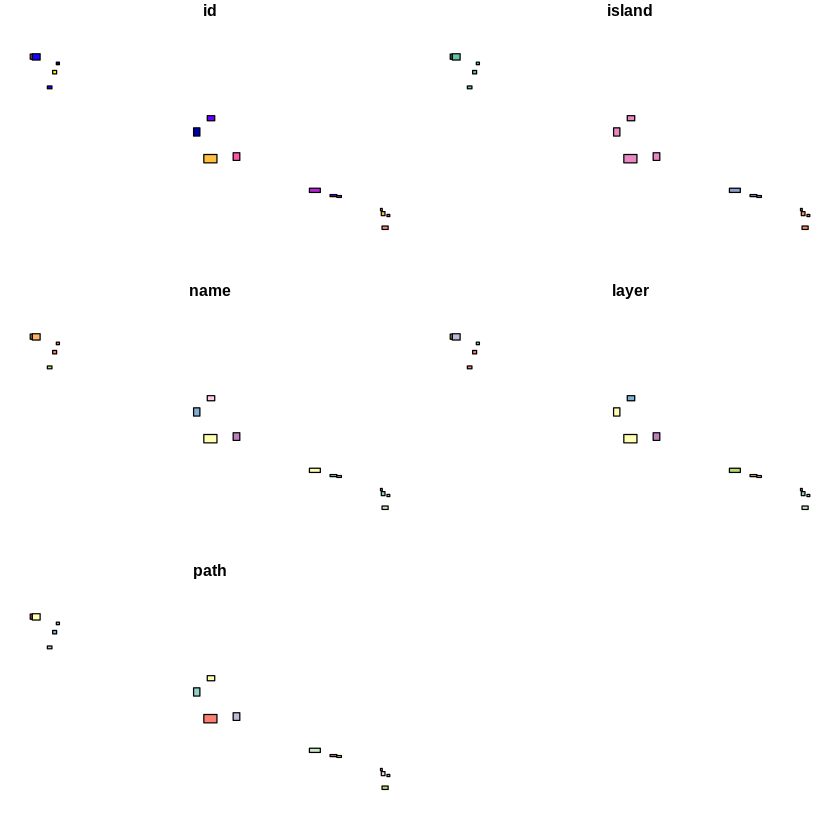

In [7]:
aoi_utm4 %>% plot

In [8]:
nlcd_utm4 <- raster("/content/workingfolder/nlcd/utm4/nlcd_utm4.tif")

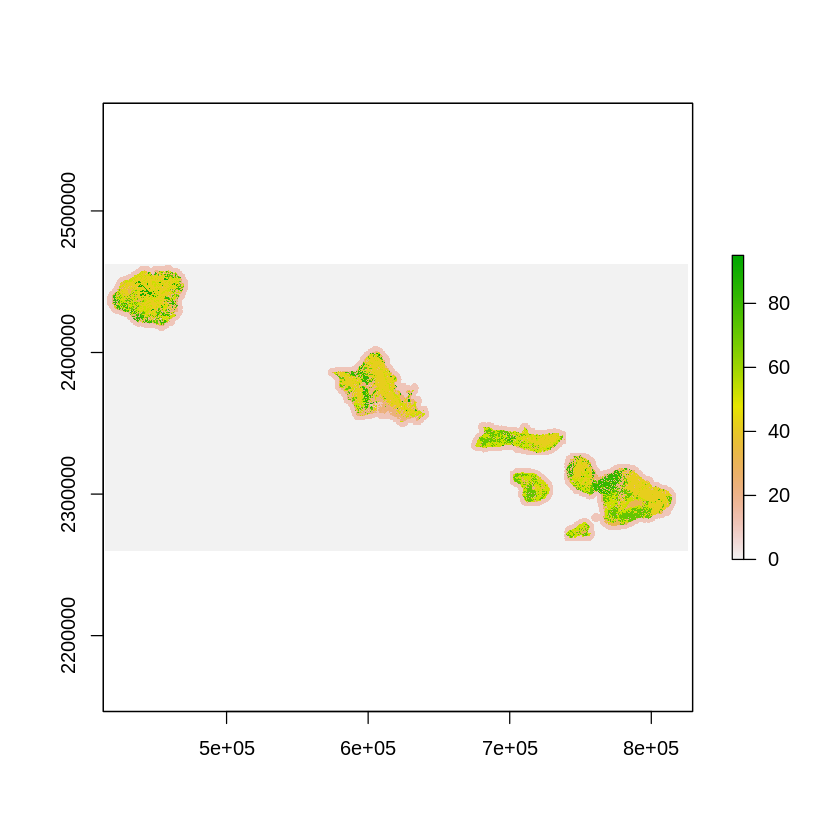

In [10]:
nlcd_utm4 %>% plot

In [11]:
nwi_utm4 <- st_read("/content/workingfolder/nwi_utm4/nwi_utm4.gpkg")

Reading layer `nwi_utm4_numeric' from data source 
  `/content/workingfolder/nwi_utm4/nwi_utm4.gpkg' using driver `GPKG'
Simple feature collection with 10866 features and 8 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 412977.7 ymin: 2263072 xmax: 820600.7 ymax: 2464465
Projected CRS: WGS 84 / UTM zone 4N


In [12]:
nwi_utm4

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

objectid,attribute,acres,wetland_ty,st_areasha,st_perimet,value,wetland_ty_numeric,geom
<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
65,E1UBL,0.57719824,Estuarine and Marine Deepwater,2335.83841,235.37673,1,1,MULTIPOLYGON (((601338.6 23...
66,E1UBL,0.09291047,Estuarine and Marine Deepwater,375.99535,94.25132,1,1,MULTIPOLYGON (((601275.1 23...
67,E1UBL,0.21359442,Estuarine and Marine Deepwater,864.38594,158.10603,1,1,MULTIPOLYGON (((601233.2 23...
68,E1UBL,0.94985295,Estuarine and Marine Deepwater,3843.91853,546.20280,1,1,MULTIPOLYGON (((601315 2362...
69,E2EM1N,0.70531529,Estuarine and Marine Wetland,2854.30971,322.27311,4,4,MULTIPOLYGON (((601279.9 23...
70,E2USNx,0.52518745,Estuarine and Marine Wetland,2125.35822,236.82586,4,4,MULTIPOLYGON (((594710.2 23...
71,M2RS/ABN,0.00968637,Estuarine and Marine Wetland,39.19933,23.93514,4,4,MULTIPOLYGON (((595947 2355...
72,M2RS/ABN,0.17674767,Estuarine and Marine Wetland,715.27246,131.52469,4,4,MULTIPOLYGON (((595968.8 23...
73,M2RS/ABN,0.27420158,Estuarine and Marine Wetland,1109.65444,228.71957,4,4,MULTIPOLYGON (((595754.1 23...


In [16]:
vrt_utm4_2018 <- stack("/content/workingfolder/planet/2018/utm4/2018_select_vrt.vrt")

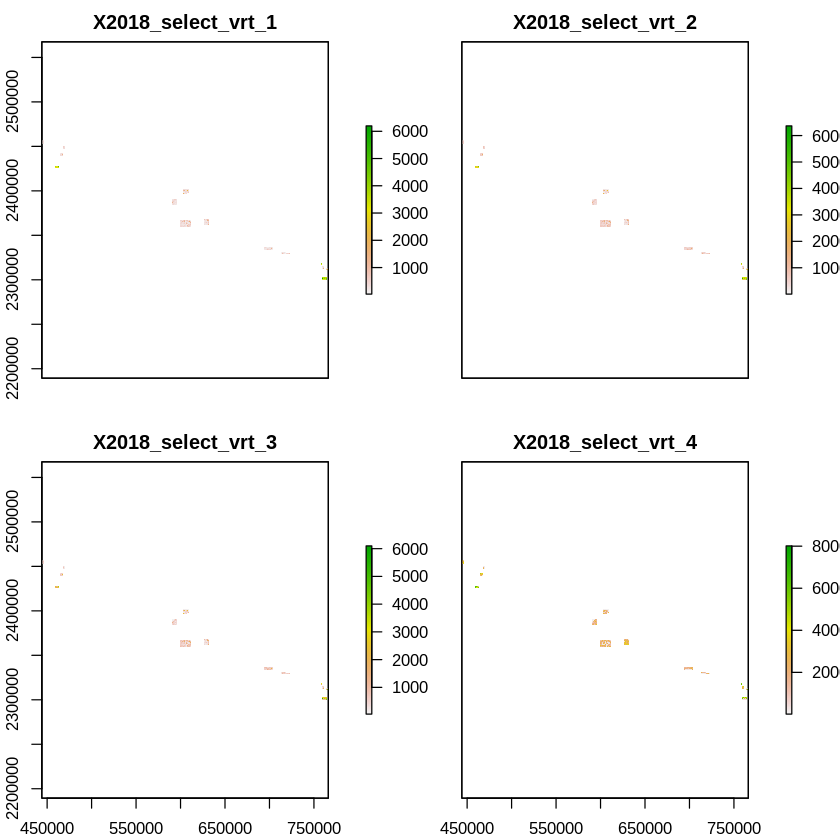

In [18]:
vrt_utm4_2018 %>% plot

In [13]:
unified_data_table <- data.table (unified = c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
nwi_data_table <- data.table (nwi = list(-1, c(1,2,3), 4, 5, 6, 7, -1, -1, -1, -1, -1, -1))
nlcd_data_table <- data.table(nlcd = list(-1, 11, 90, 95, -1, -1, c(21,22,23,24), c(81,82), 71, 31, c(41,42,43), 52))
ccap_labels_data_table <- data.table(ccap = list(c(0,1), c(19,21), c(16,17,18), c(13,15), 14, c(22,23), c(2,3,4,5), c(6,7), 8, 20, c(9,10,11), 12))

unified_data_table_all <- data.table (
  unified_data_table,
  nwi_data_table,
  nlcd_data_table,
  ccap_labels_data_table)

In [14]:
ccap_path =c('/content/workingfolder/ccap/utm4/kauai_ccap_2010.tif',
'/content/workingfolder/ccap/utm4/oahu_ccap_2010.tif',
'/content/workingfolder/ccap/utm4/molokai_ccap_2010.tif',
'/content/workingfolder/ccap/utm4/maui_ccap_2010.tif')
ccap_path_data_table <- data.table (ccap_path)

island = c('kauai','oahu','molokai','maui')
island_data_table <- data.table (island)

dem_path =c('/content/workingfolder/dem/utm4/wgs84_kauai_10m.tif',
'/content/workingfolder/dem/utm4/wgs84_oahu_dem.tif',
'/content/workingfolder/dem/utm4/wgs84_molokai_dem.tif',
'/content/workingfolder/dem/utm4/wgs84_maui_dem.tif')
dem_path_data_table <- data.table (dem_path)

linked_dt <- data.table (
  island_data_table,
  ccap_path_data_table,
  dem_path_data_table)

linked_dt$ccap_raster <- linked_dt$ccap_path %>% lapply(stack)
linked_dt$dem_raster <- linked_dt$dem_path %>% lapply(stack)

In [15]:
linked_dt

island,ccap_path,dem_path,ccap_raster,dem_raster
<chr>,<chr>,<chr>,<list>,<list>
kauai,/content/workingfolder/ccap/utm4/kauai_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_kauai_10m.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
oahu,/content/workingfolder/ccap/utm4/oahu_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_oahu_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
molokai,/content/workingfolder/ccap/utm4/molokai_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_molokai_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
maui,/content/workingfolder/ccap/utm4/maui_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_maui_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>


In [38]:
#  Planet grid at 128 x 128 pixels
planet_fishnet_384 <-
  1:nrow(aoi_utm4) %>% lapply(function(x){
    fishnet <- st_make_grid(aoi_utm4[x,], cellsize = c(384,384)) %>% st_as_sf %>% data.table
    fishnet$id <-1:length(fishnet)
    fishnet_int <- fishnet %>%
      st_as_sf() %>%
        st_intersection(aoi_utm4[x,]) %>%
          st_transform(st_crs(26904)) %>%
            data.table()
    fishnet <- fishnet[fishnet$id %in% fishnet_int$id ]

    fishnet$island <- aoi_utm4$island[x]
    fishnet$layer <- aoi_utm4$layer[x]



    return(fishnet)
    # print(fishnet)
    # print(class(fishnet))
    # print(st_crs(fishnet))
    # plot(fishnet)

  }) %>% rbindlist()

planet_fishnet_384_sf <- st_as_sf(planet_fishnet_384)
class(planet_fishnet_384_sf)
st_crs(planet_fishnet_384_sf)

planet_fishnet_384_sf_transformed <- st_transform(planet_fishnet_384_sf, crs = 26904)

st_crs(planet_fishnet_384_sf_transformed)


st_write(planet_fishnet_384_sf_transformed, "/content/sample_data/planet_fishnet_384_sf_transformed.gpkg", append=TRUE)



Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant through

[1] "sf"         "data.table" "data.frame"

Coordinate Reference System:
  User input: WGS 84 / UTM zone 4N 
  wkt:
PROJCRS["WGS 84 / UTM zone 4N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT

Coordinate Reference System:
  User input: EPSG:26904 
  wkt:
PROJCRS["NAD83 / UTM zone 4N",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-159,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,

Updating layer `planet_fishnet_384_sf_transformed' to data source `/content/sample_data/planet_fishnet_384_sf_transformed.gpkg' using driver `GPKG'
Writing 2666 features with 3 fields and geometry type Polygon.


In [37]:
planet_fishnet_384_sf_transformed %>% st_crs

Coordinate Reference System:
  User input: EPSG:26904 
  wkt:
PROJCRS["NAD83 / UTM zone 4N",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-159,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,

In [22]:
dir.create("/content/testexports")

In [24]:
################ UTM 4 for Kauai, Oahu, Molokai, Maui.

cl <- makeCluster(8)
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)

# planet_fishnet_384_sf aoi_utm4_wetland_fishnet_sf

placeholder <- c(1347) %>% lapply(function(u){
test <- planet_fishnet_384_sf[u,] %>% st_transform(st_crs(26904)) %>% crop(vrt_utm4_2018,.)
test_extent <-extent(test)
test_extent_raster <- raster(nrow=384, ncol=384, ext=test_extent, crs=crs(26904)) # nrow=384, ncol=384 is necessary to ensure the width and height are correct!
test_extent_raster_size <- crop(resample(test, test_extent_raster, method = "ngb"), extent(test_extent_raster)) # this is the planet tiles!
crs(test_extent_raster_size) <- CRS("+init=epsg:26904")


test_nwi_crop <- nwi_utm4 %>% st_intersection(planet_fishnet_384_sf[u,] %>% st_transform(st_crs(nwi_utm4))) %>%
  st_transform(st_crs(26904)) %>% fasterize(.,test_extent_raster_size[[1]], "wetland_ty_numeric")

# test_nlcd_crop <- planet_fishnet_384_sf[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>% crop(nlcdImages,.) %>%
#   resample(test_extent_raster_size, method = "ngb")

# test_dem_crop <- planet_fishnet_384_sf[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>%
#   crop(linked_planet_dem_ccap_dt[island ==planet_fishnet_384_sf[u,]$island]$dem_raster[[1]],.) %>% resample(test_extent_raster_size, method= "ngb")

# test_ccap_crop <- planet_fishnet_384_sf[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>%
#   crop(linked_planet_dem_ccap_dt[island ==planet_fishnet_384_sf[u,]$island]$ccap_raster[[1]],.) %>% resample(test_extent_raster_size, method = "ngb")

# # test_planet_crop <- planet_fishnet_384_sf[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>%
# #   crop(linked_planet_dem_ccap_dt[island ==planet_fishnet_384_sf[u,]$island]$planet_raster[[1]],.) %>% resample(test_extent_raster_size, method = "ngb")


# nwi_harm <- test_nwi_crop
# nlcd_harm <- test_nlcd_crop
# ccap_harm <- test_ccap_crop

# values(nwi_harm) <- -1
# values(nlcd_harm) <- -1
# values(ccap_harm) <- -1

# for(i in 1:nrow(unified_data_table_all)){
#  values(nwi_harm)[ values(test_nwi_crop %in% unified_data_table_all$nwi[[i]])] <- unified_data_table_all$unified[[i]]
#  values(nlcd_harm)[ values(test_nlcd_crop %in% unified_data_table_all$nlcd[[i]])] <- unified_data_table_all$unified[[i]]
#  values(ccap_harm)[ values(test_ccap_crop %in% unified_data_table_all$ccap[[i]])] <- unified_data_table_all$unified[[i]]

# }

# nwi_filled <- ccap_harm # nlcd_harm
# values(nwi_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_filled)[values(nwi_filled) ==-1] <- 12

# nwi_filled2 <- nlcd_harm # ccap_harm
# values(nwi_filled2)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_filled2)[values(nwi_filled2) ==-1] <- 12

# ccap_filled <- ccap_harm
# values(ccap_filled)[values(ccap_harm) !=-1] <- values(ccap_harm)[values(ccap_harm) !=-1]
# values(ccap_filled)[values(ccap_filled) ==-1] <- 12





# test_planet_crop %>% writeRaster(paste0('/content/exports/planet_data/', u,"_planet",'.tif'),overwrite=T)
# nwi_filled %>% writeRaster(paste0('/content/exports/nwi/', u,"_nwiFilled",'.tif'),overwrite=T)
# test_dem_crop %>% writeRaster(paste0('/content/exports/dem/', u,"_dem",'.tif'),overwrite=T)
# ccap_filled %>% writeRaster(paste0('/content/exports/ccap/', u,"_ccapFilled",'.tif'),overwrite=T)


test_extent_raster_size %>% writeRaster(paste0('/content/testexports/', u,"_planet",'.tif'),overwrite=T)
# nwi_filled %>% writeRaster(paste0('/content/testexports/', u,"_nwiccap",'.tif'),overwrite=T)
# test_dem_crop %>% writeRaster(paste0('/content/testexports/', u,"_dem",'.tif'),overwrite=T)
# ccap_filled %>% writeRaster(paste0('/content/testexports/', u,"_ccap",'.tif'),overwrite=T)
# test_nlcd_crop %>% writeRaster(paste0('/content/testexports/', u,"_nlcd",'.tif'),overwrite=T)
# nwi_filled2 %>% writeRaster(paste0('/content/testexports/', u,"_nwinlcd",'.tif'),overwrite=T)


})

stopCluster(cl)

# zip(zipfile = "/content/export001_planet_2019_utm4.zip",
#     files = c("/content/exports/planet_data",
#     "/content/exports/nwi",
#     "/content/exports/ccap",
#     "/content/exports/dem"))
# # https://drive.google.com/drive/folders/1sSsUCJZ3gqAOmKAuFfsgJTyTK2-Q0NBx?usp=drive_link
# drive_upload(media = "/content/export001_planet_2019_utm4.zip", path = as_id("1sSsUCJZ3gqAOmKAuFfsgJTyTK2-Q0NBx"))